In [1]:
from utils import *
from scipy import optimize
import matplotlib

In [2]:
4, 25, 100, 

(4, 25, 100)

In [16]:
for i in range(0, 100):
    kernel = NTK(depth = 3+i, bias=3)
    # kernel = Matern(nu=0.5)
    x = np.array([0.2672612, 0.5345225, 0.8017837]).reshape(1,-1)
    y = np.array([0.4558423, 0.5698029, 0.6837635]).reshape(1,-1)
    # print(f'Depth: {3+i} Value: ', kernel(x, y))

In [17]:
z = np.linspace(-2, 2, 100)
x = (z**2 + 1) * np.sin(np.linspace(-np.pi, np.pi, 100))
y = (z**2 + 1) * np.cos(np.linspace(-np.pi, np.pi, 100))

datasets = processing(x, y, z, noise = 0.15)
X, y = datasets['orig']
X_norm, _ = datasets['norm']
X_train, y_train, y_train_noisy = datasets['orig train']
X_norm_train, _, _ = datasets['norm train']

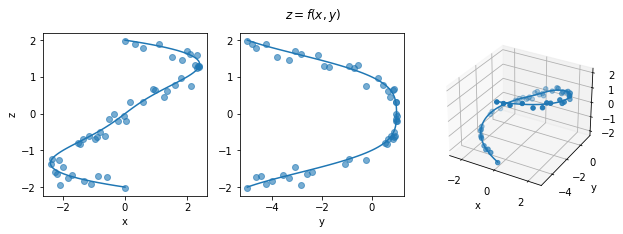

In [18]:
fig, ax = plot((X, X_train), (y.ravel(), y_train_noisy), typ='data', title=r"$z = f(x, y)$")
fig.savefig('./illustrative/dataset.svg')

In [39]:
ntk_1 = (
    ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-9, 1e5)) * 
    NTK(depth=3, c=2, bias=1e-9, 
        bias_bounds=(1e-9, 1e2))
)

gp_ntk_1 = GPR(kernel=ntk_1, normalize_y=True, alpha=1e-5, n_restarts_optimizer=9, random_state=3480795)
gp_ntk_1.fit(X_train, y_train)
mean_ntk_1 = gp_ntk_1.predict(X)

gp_ntk_1.kernel_

# lpk_1 = (
#     ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-9, 1e5)) * 
#     Matern(length_scale=np.linalg.norm(xn-yn)/np.log(1/ntk_val_n),
#         length_scale_bounds='fixed',#(1e-9, 1e3), 
#         nu=1/2)
# )

/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1e+05. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/anaconda/envs/thesis/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__bias is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


316**2 * NTK(depth=3, c=2.000, bias=100.000)

(<Figure size 720x216 with 3 Axes>,
 array([<AxesSubplot:xlabel='x', ylabel='z'>, <AxesSubplot:xlabel='y'>,
        <Axes3DSubplot:xlabel='x', ylabel='y'>], dtype=object))

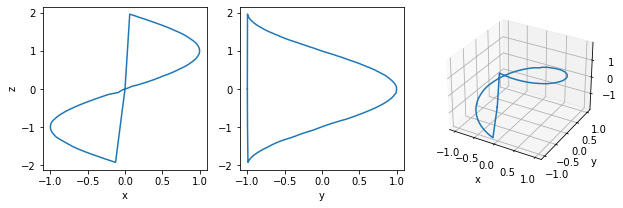

In [40]:
plot(X_norm, mean_ntk_1.ravel(), typ='data')